<a href="https://colab.research.google.com/github/tanutripathi1810/AgriSense/blob/main/AgriSense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("cleaned_agriculture_dataset.csv")

# Show the first 5 rows
print(df.head())


   Nitrogen (kg/ha)  Phosphorus (kg/ha)  Potassium (kg/ha)    pH  \
0               101                  58                 68  7.92   
1               142                  46                 30  7.29   
2                64                  28                 40  5.60   
3               121                  34                 86  6.50   
4               110                  34                 79  6.58   

   Organic Carbon (%)  Rainfall (mm)  Temperature (°C)  Humidity (%)   Crop  \
0                1.01            823              24.2          51.7   Rice   
1                1.31            645              34.9          64.8  Wheat   
2                1.64            345              22.1          67.9  Maize   
3                1.98            845              25.1          30.8  Maize   
4                2.03            377              27.4          69.8  Maize   

   Yield (kg/ha)  
0     127.673492  
1     134.450153  
2      87.338716  
3     151.501420  
4     121.799440  


In [ ]:
# Convert categorical column 'Crop' to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=["Crop"])

# Separate features and target
X = df_encoded.drop("Yield (kg/ha)", axis=1)
y = df_encoded["Yield (kg/ha)"]


In [ ]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale X to [0, 1]
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    random_state=42
)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 8.49
RMSE: 10.78
R² Score: 0.83


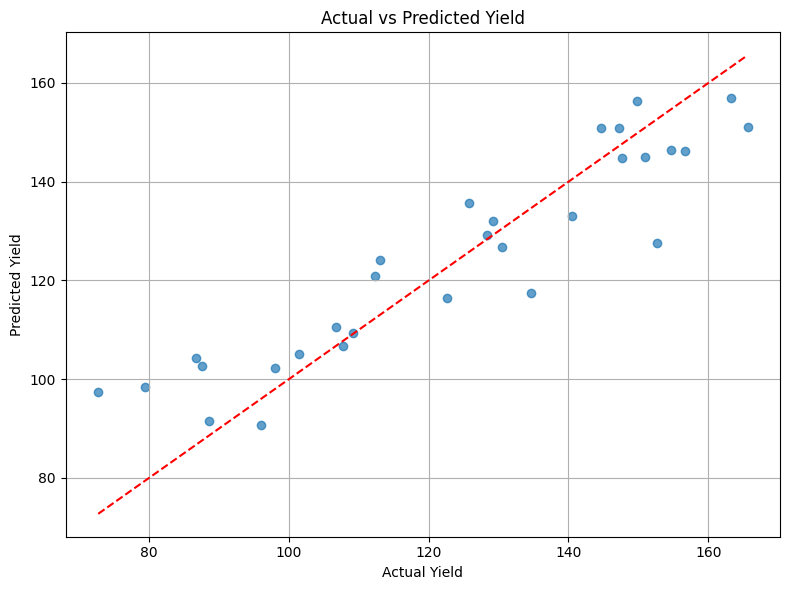

In [ ]:
import matplotlib.pyplot as plt

# Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()


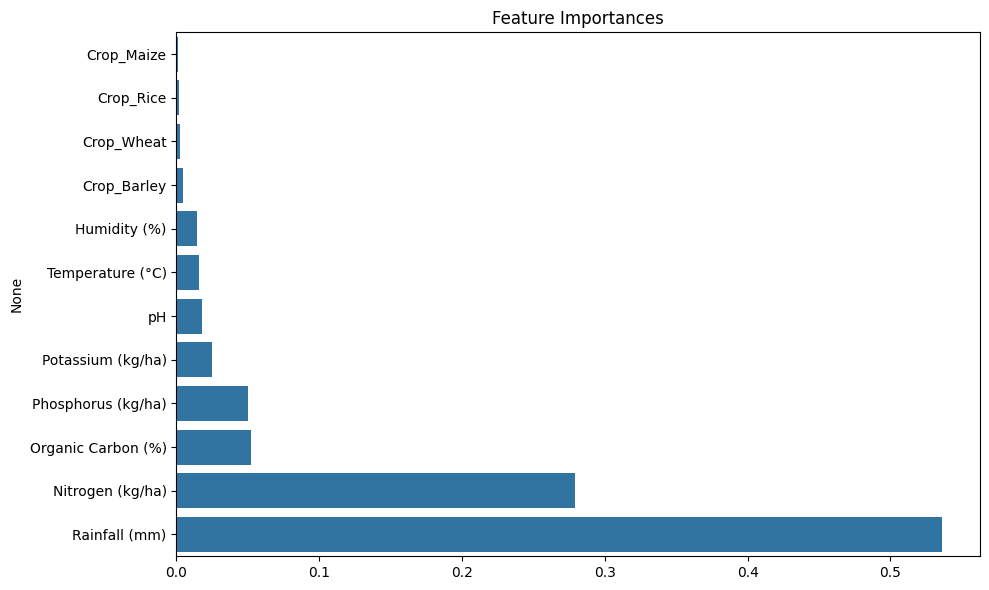

In [ ]:
import seaborn as sns
import numpy as np

feature_importance = model.feature_importances_
features = X.columns

# Create a sorted bar plot
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


MAE: 8.37
RMSE: 10.66
R² Score: 0.84


MAE: 10.37
RMSE: 12.76
R²: 0.77
